### Dimensions of the Dataset (without containing target column)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_breast_cancer

br_c = load_breast_cancer()
df_brc = pd.DataFrame(br_c.data, columns = [br_c.feature_names])
df_brc_trgt = pd.DataFrame(br_c.data, columns = [br_c.feature_names])
df_brc_trgt['target'] = pd.DataFrame(br_c.target, columns = ['target'])
df_trg = pd.DataFrame(br_c.target, columns = ['target'])
pd.set_option('precision', 4)

print (df_brc.shape, '\n')
print (df_brc.dtypes, '\n')

(569, 30) 

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst sy

### Plot Generation

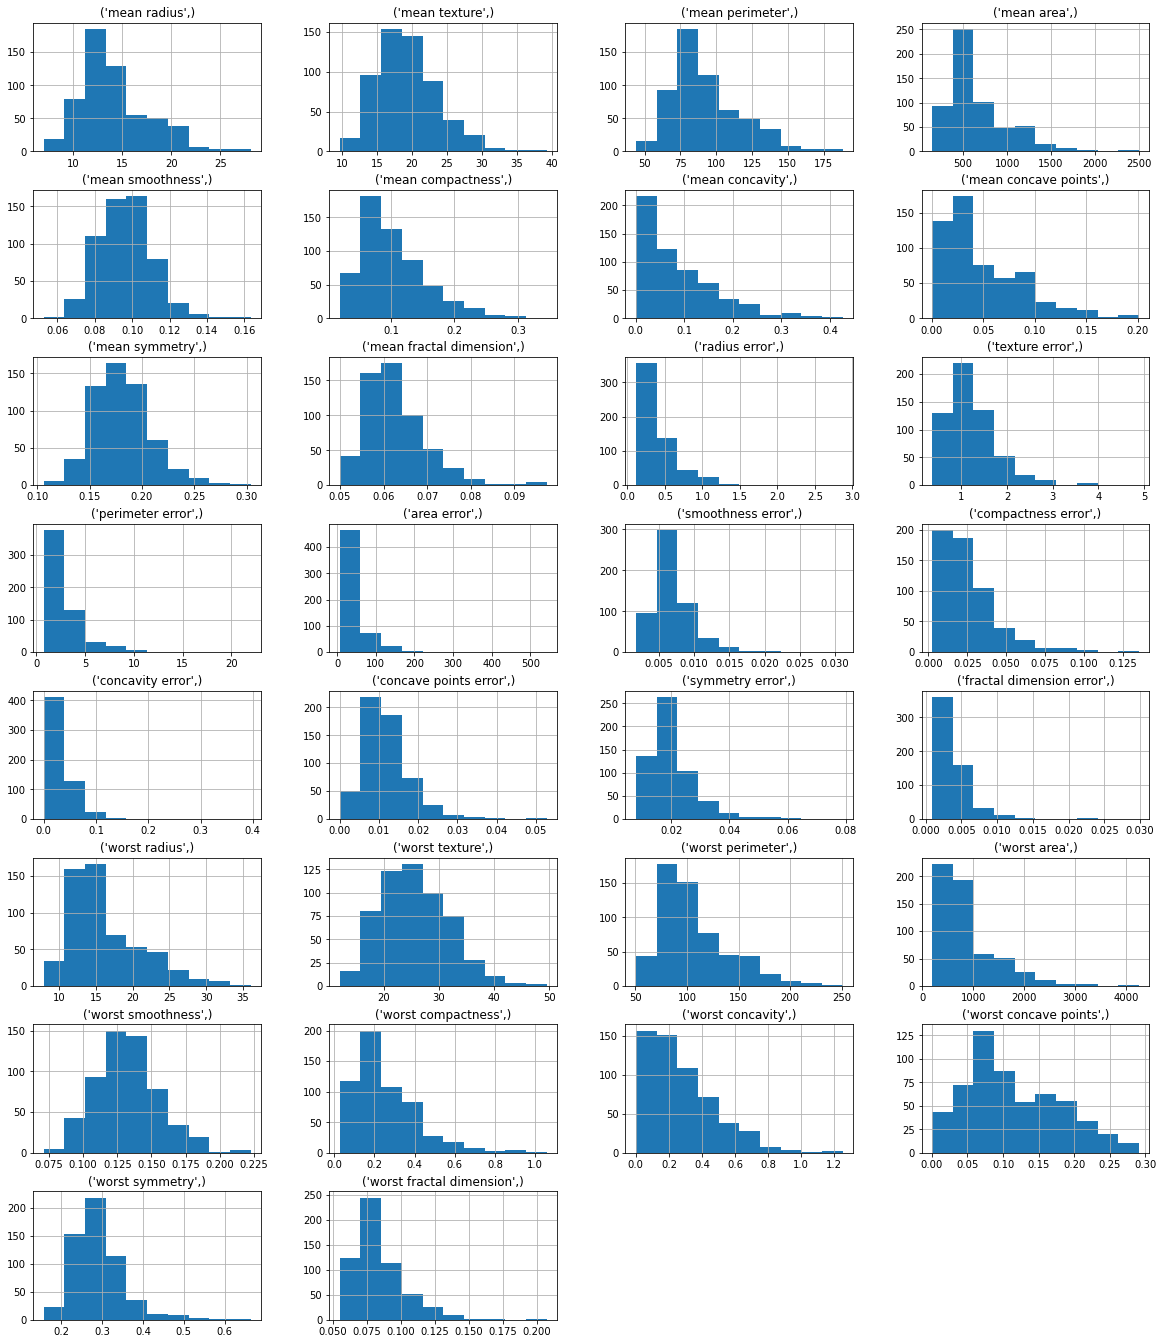

In [2]:
df_brc.hist(figsize = (20,30), layout=(10,4))
plt.show()

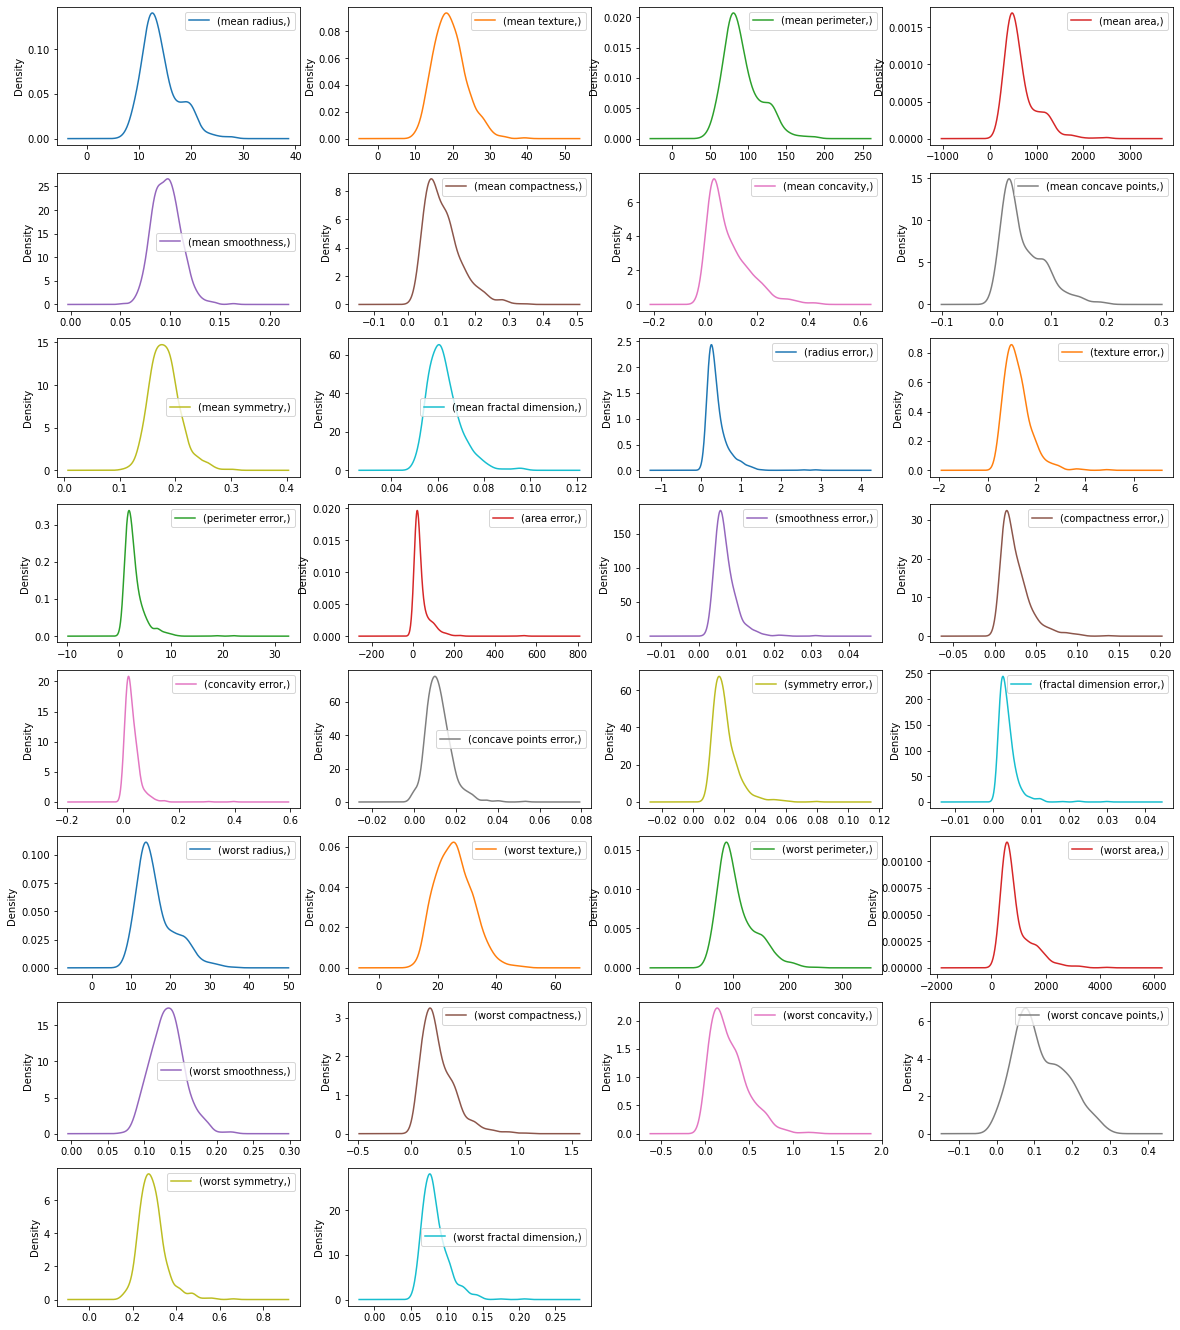

In [3]:
df_brc.plot(kind='density', subplots=True, layout=(10,4), sharex=False, figsize = (20,30))
plt.show()

<AxesSubplot:>

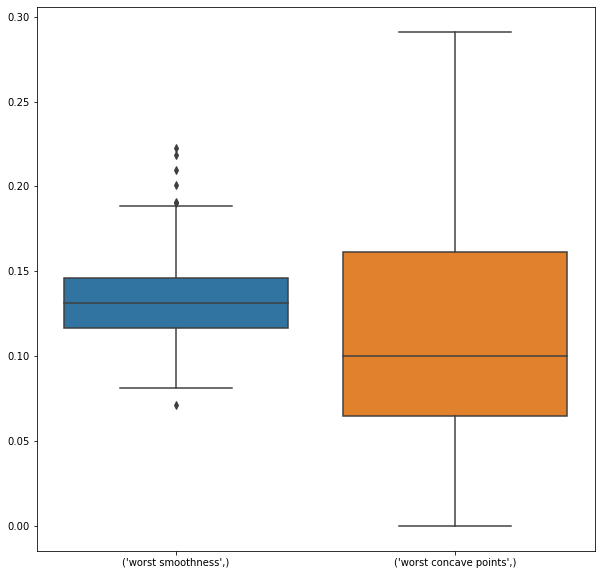

In [4]:
df_wsm_wconp = df_brc[['worst smoothness', 'worst concave points']]
plt.figure(figsize=(10,10))
sns.boxplot(data = df_wsm_wconp)

### The class distribution (number of instances per class)

In [5]:
df_trt = df_trg.replace([0,1], ['Malignant','Benign'])
print(df_trt.groupby('target').size())
print('\n0 are the Malignant instances, 1 are the Benign')
print(df_trg.groupby('target').size())

target
Benign       357
Malignant    212
dtype: int64

0 are the Malignant instances, 1 are the Benign
target
0    212
1    357
dtype: int64


### Value Scaling using "MinMaxScaler"

In [6]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
array = df_brc_trgt.values

X = array[:,0:30]
Y = array[:,30]
#(between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

set_printoptions(precision=3)
df_scaled = pd.DataFrame(rescaledX, columns = [br_c.feature_names])
df_scaled['target'] = pd.Series(data = br_c.target, name = 'target')

In [7]:
df_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,...,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000
mean,0.3382,0.3240,0.3329,0.2169,0.3948,0.2606,0.2081,0.2431,0.3796,0.2704,...,0.3640,0.2831,0.1709,0.4041,0.2202,0.2174,0.3938,0.2633,0.1896,0.6274
std,0.1668,0.1455,0.1679,0.1493,0.1270,0.1620,0.1868,0.1929,0.1385,0.1487,...,0.1638,0.1674,0.1399,0.1508,0.1526,0.1666,0.2259,0.1220,0.1185,0.4839
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.2233,0.2185,0.2168,0.1174,0.3046,0.1397,0.0693,0.1009,0.2823,0.1630,...,0.2415,0.1678,0.0811,0.3000,0.1163,0.0915,0.2231,0.1851,0.1077,0.0000
50%,0.3024,0.3088,0.2933,0.1729,0.3904,0.2247,0.1442,0.1665,0.3697,0.2439,...,0.3569,0.2353,0.1232,0.3971,0.1791,0.1811,0.3434,0.2478,0.1640,1.0000
75%,0.4164,0.4089,0.4168,0.2711,0.4755,0.3405,0.3062,0.3678,0.4530,0.3404,...,0.4717,0.3735,0.2209,0.4942,0.3025,0.3058,0.5546,0.3182,0.2429,1.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### Feature Selection Process, based on original dataframe

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
array = df_brc_trgt.values
X = array[:,0:30]
Y = array[:,30]
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
np.set_printoptions(precision=3)
print("Fit scores:")
num = 0
for num in range(30):
    print(br_c.feature_names[num])
    print(fit.scores_[num],'\n')

print("Selected features: mean perimeter, mean area, area error, worst perimeter")
features = fit.transform(X)

print("\n Summarise selected features:")
print(features[0:5,:])

Fit scores:
mean radius
266.1049171951782 

mean texture
93.89750809863386 

mean perimeter
2011.1028637679044 

mean area
53991.655923751 

mean smoothness
0.14989926383938185 

mean compactness
5.403075490732699 

mean concavity
19.71235355279165 

mean concave points
10.544035428542989 

mean symmetry
0.2573797748087877 

mean fractal dimension
7.430655358550388e-05 

radius error
34.67524723165557 

texture error
0.009793539703987046 

perimeter error
250.57189635982138 

area error
8758.504705334488 

smoothness error
0.003266206639423663 

compactness error
0.6137853315214398 

concavity error
1.0447176147781312 

concave points error
0.30523156337832863 

symmetry error
8.036338308403279e-05 

fractal dimension error
0.006371365657039493 

worst radius
491.6891574333224 

worst texture
174.44939960571082 

worst perimeter
3665.0354163405864 

worst area
112598.43156405361 

worst smoothness
0.39736569437302804 

worst compactness
19.314921984068796 

worst concavity
39.516915074

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")
rfe = RFE(model, 4)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print("")
for x,y in zip(br_c.feature_names, fit.support_):
    print("Feature: "+x+" selected: ",y)

print("\nSelected features: mean radius, mean concavity, worst radius, worst concavity")

Num Features: 4
Selected Features: [ True False False False False False  True False False False False False
 False False False False False False False False  True False False False
 False False  True False False False]
Feature Ranking: [ 1 11 13 27 14 18  1  3  8 23 22  9  4  7 24 26 15 20 19 25  1 10  5 21
 16  6  1  2 17 12]

Feature: mean radius selected:  True
Feature: mean texture selected:  False
Feature: mean perimeter selected:  False
Feature: mean area selected:  False
Feature: mean smoothness selected:  False
Feature: mean compactness selected:  False
Feature: mean concavity selected:  True
Feature: mean concave points selected:  False
Feature: mean symmetry selected:  False
Feature: mean fractal dimension selected:  False
Feature: radius error selected:  False
Feature: texture error selected:  False
Feature: perimeter error selected:  False
Feature: area error selected:  False
Feature: smoothness error selected:  False
Feature: compactness error selected:  False
Feature: con

C:\Users\glama\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [10]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, Y)
for x,y in zip(br_c.feature_names, model.feature_importances_):
    print("Feature: "+x+" importance: ",y)

print("\nmean concave points, worst radius, worst perimeter, worst concave points")

Feature: mean radius importance:  0.04786218672541948
Feature: mean texture importance:  0.020976683787993493
Feature: mean perimeter importance:  0.054947359846066905
Feature: mean area importance:  0.03765698437620434
Feature: mean smoothness importance:  0.01140367130788901
Feature: mean compactness importance:  0.026012571946921005
Feature: mean concavity importance:  0.062485098210895845
Feature: mean concave points importance:  0.08955603112748685
Feature: mean symmetry importance:  0.005730647865668862
Feature: mean fractal dimension importance:  0.006010031860447215
Feature: radius error importance:  0.02796856448700201
Feature: texture error importance:  0.005434066513449191
Feature: perimeter error importance:  0.02137337397580413
Feature: area error importance:  0.034808047534551904
Feature: smoothness error importance:  0.006519276488575415
Feature: compactness error importance:  0.005612151930750498
Feature: concavity error importance:  0.006552364455527259
Feature: concav

In [11]:
df_selected = df_brc_trgt [['mean perimeter', 'mean area', 'worst perimeter',
                           'mean radius', 'mean concavity', 'worst radius', 'worst concavity',
                          'mean concave points', 'worst concave points', 'target']]
df_selected

,mean perimeter,mean area,worst perimeter,mean radius,mean concavity,worst radius,worst concavity,mean concave points,worst concave points,target
0,122.80,1001.0,184.60,17.99,0.3001,25.380,0.7119,0.1471,0.2654,0
1,132.90,1326.0,158.80,20.57,0.0869,24.990,0.2416,0.0702,0.1860,0
2,130.00,1203.0,152.50,19.69,0.1974,23.570,0.4504,0.1279,0.2430,0
3,77.58,386.1,98.87,11.42,0.2414,14.910,0.6869,0.1052,0.2575,0
4,135.10,1297.0,152.20,20.29,0.1980,22.540,0.4000,0.1043,0.1625,0
...,...,...,...,...,...,...,...,...,...,...
564,142.00,1479.0,166.10,21.56,0.2439,25.450,0.4107,0.1389,0.2216,0
565,131.20,1261.0,155.00,20.13,0.1440,23.690,0.3215,0.0979,0.1628,0
566,108.30,858.1,126.70,16.60,0.0925,18.980,0.3403,0.0530,0.1418,0
567,140.10,1265.0,184.60,20.60,0.3514,25.740,0.9387,0.1520,0.2650,0


### Correlation

<AxesSubplot:xlabel='None', ylabel='None'>

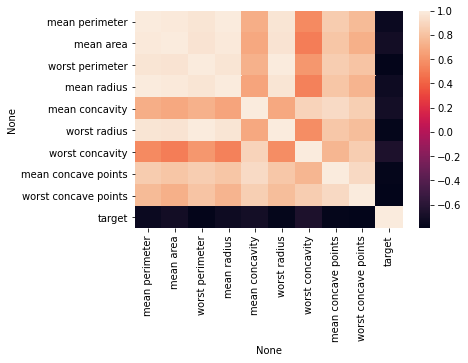

In [12]:
sns.heatmap(df_selected.corr())

In [13]:
df_selected.corr()

,mean perimeter,mean area,worst perimeter,mean radius,mean concavity,worst radius,worst concavity,mean concave points,worst concave points,target
mean perimeter,1.0000,0.9865,0.9704,0.9979,0.7161,0.9695,0.5639,0.8510,0.7712,-0.7426
mean area,0.9865,1.0000,0.9591,0.9874,0.6860,0.9627,0.5126,0.8233,0.7220,-0.7090
worst perimeter,0.9704,0.9591,1.0000,0.9651,0.7296,0.9937,0.6183,0.8559,0.8163,-0.7829
mean radius,0.9979,0.9874,0.9651,1.0000,0.6768,0.9695,0.5269,0.8225,0.7442,-0.7300
mean concavity,0.7161,0.6860,0.7296,0.6768,1.0000,0.6882,0.8841,0.9214,0.8613,-0.6964
worst radius,0.9695,0.9627,0.9937,0.9695,0.6882,1.0000,0.5740,0.8303,0.7874,-0.7765
worst concavity,0.5639,0.5126,0.6183,0.5269,0.8841,0.5740,1.0000,0.7524,0.8554,-0.6596
mean concave points,0.8510,0.8233,0.8559,0.8225,0.9214,0.8303,0.7524,1.0000,0.9102,-0.7766
worst concave points,0.7712,0.7220,0.8163,0.7442,0.8613,0.7874,0.8554,0.9102,1.0000,-0.7936
target,-0.7426,-0.7090,-0.7829,-0.7300,-0.6964,-0.7765,-0.6596,-0.7766,-0.7936,1.0000


### Algorithm Selection

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df_selected.iloc[:,0:9].values
Y = df_selected.iloc[:,9].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

st_c = StandardScaler()
X_train = st_c.fit_transform(X_train)
X_test = st_c.fit_transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X_train, Y_train)
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, Y_train)
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)
print('Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
print('Decision Tree Classifier Accuracy: ', tree.score(X_train, Y_train))
print('Random Forest Classifier Accuracy: ', forest.score(X_train, Y_train))

Logistic Regression Training Accuracy:  0.9604395604395605
Decision Tree Classifier Accuracy:  1.0
Random Forest Classifier Accuracy:  1.0


In [16]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(Y_test, log.predict(X_test))

Tr_Pos = c_matrix[0][0]
Tr_Neg = c_matrix[1][1]
F_Pos = c_matrix[0][1]
F_Neg = c_matrix[1][0]

print(c_matrix)
print('Logistic Regression Testing Acc.: = ', (Tr_Pos + Tr_Neg)/(Tr_Pos + Tr_Neg + F_Pos + F_Neg))

[[44  3]
 [ 3 64]]
Logistic Regression Testing Acc.: =  0.9473684210526315


In [17]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(Y_test, tree.predict(X_test))

Tr_Pos = c_matrix[0][0]
Tr_Neg = c_matrix[1][1]
F_Pos = c_matrix[0][1]
F_Neg = c_matrix[1][0]

print(c_matrix)
print('Decision Tree Classifier Testing Acc.: = ', (Tr_Pos + Tr_Neg)/(Tr_Pos + Tr_Neg + F_Pos + F_Neg))

[[43  4]
 [ 5 62]]
Decision Tree Classifier Testing Acc.: =  0.9210526315789473


In [18]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(Y_test, forest.predict(X_test))

Tr_Pos = c_matrix[0][0]
Tr_Neg = c_matrix[1][1]
F_Pos = c_matrix[0][1]
F_Neg = c_matrix[1][0]

print(c_matrix)
print('Random Forest Classifier Testing Acc.: = ', (Tr_Pos + Tr_Neg)/(Tr_Pos + Tr_Neg + F_Pos + F_Neg))

[[43  4]
 [ 3 64]]
Random Forest Classifier Testing Acc.: =  0.9385964912280702


### Conclusion:
After various experiments Logistic Regression training algorithm wins.